In [0]:
# libraries
%matplotlib inline
import numpy as np
from numpy.linalg import eig
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import slycot
import control
from scipy.signal import place_poles

# Task F

The task is done for 2 sets of poles:
- p[-4 ,-5, -6.6, -7]
- p[-10 ,-6.6, -8.4, -7]

In order for a system negative, it poles must be negative

Applying `place_poles` we find matrix K and obtain the following:
$z' = (A - BK)z = A\_cont \cdot z $

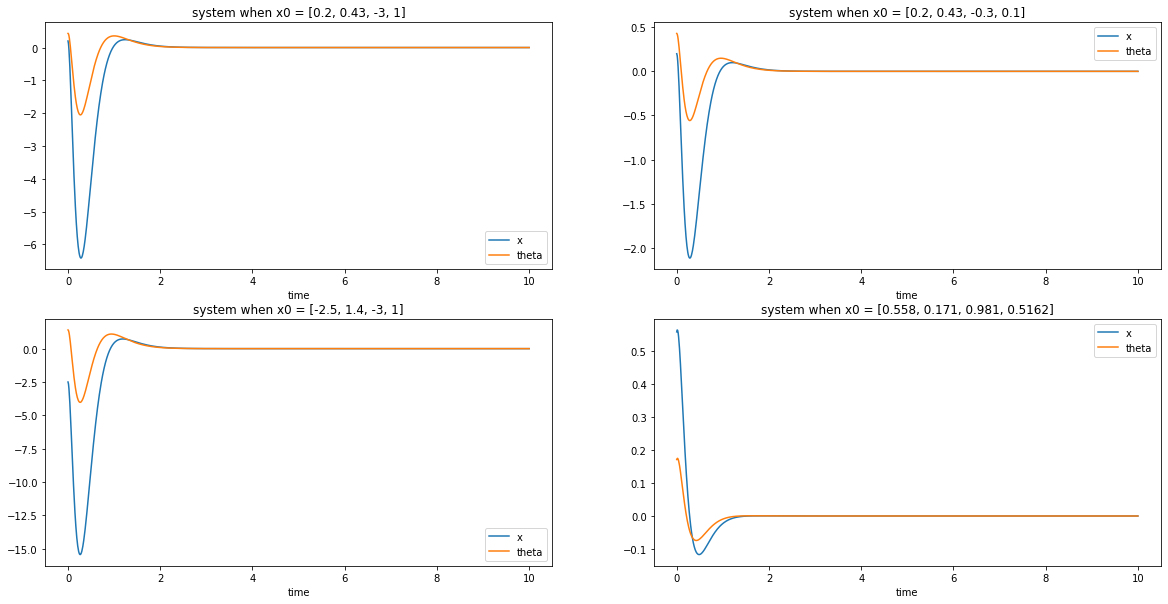

In [82]:
# initializing matrices
A = np.array([[0, 0, 1, 0], [0, 0, 0, 1], [0, 12.83, 0, 0], [0, 10.78, 0, 0]])
B = np.array([[0], [0], [0.24], [0.11]])

# desired poles
p = np.array([-4 ,-5, -6.6, -7])

# obtaining K
K = place_poles(A, B, p)
A_cont = A - B.dot(K.gain_matrix)


def func(x, t):
    x_new = np.array([[x[0]], [x[1]], [x[2]], [x[3]]])
    return A_cont.dot(x_new).flatten()

time = np.linspace(0, 10, 1000)

# Plotting

plt.figure(figsize=(20, 10))

x0 = [0.2, 0.43, -3, 1]
solution = odeint(func, x0, time)
ax = plt.subplot(221)
plt.plot(time, solution[:, 0], label = 'x')
plt.plot(time, solution[:, 1], label = 'theta')
plt.legend(loc='best')
plt.xlabel('time')
plt.title(f'system when x0 = {x0}')

x0 = [0.2, 0.43, -0.3, 0.1]
solution = odeint(func, x0, time)
ax = plt.subplot(222)
plt.plot(time, solution[:, 0], label = 'x')
plt.plot(time, solution[:, 1], label = 'theta')
plt.legend(loc='best')
plt.xlabel('time')
plt.title(f'system when x0 = {x0}')

x0 = [-2.5, 1.4, -3, 1]
solution = odeint(func, x0, time)
ax = plt.subplot(223)
plt.plot(time, solution[:, 0], label = 'x')
plt.plot(time, solution[:, 1], label = 'theta')
plt.legend(loc='best')
plt.xlabel('time')
plt.title(f'system when x0 = {x0}')

x0 = [0.558, 0.171, 0.981, 0.5162]
solution = odeint(func, x0, time)
ax = plt.subplot(224)
plt.plot(time, solution[:, 0], label = 'x')
plt.plot(time, solution[:, 1], label = 'theta')
plt.legend(loc='best')
plt.xlabel('time')
plt.title(f'system when x0 = {x0}')

plt.show()

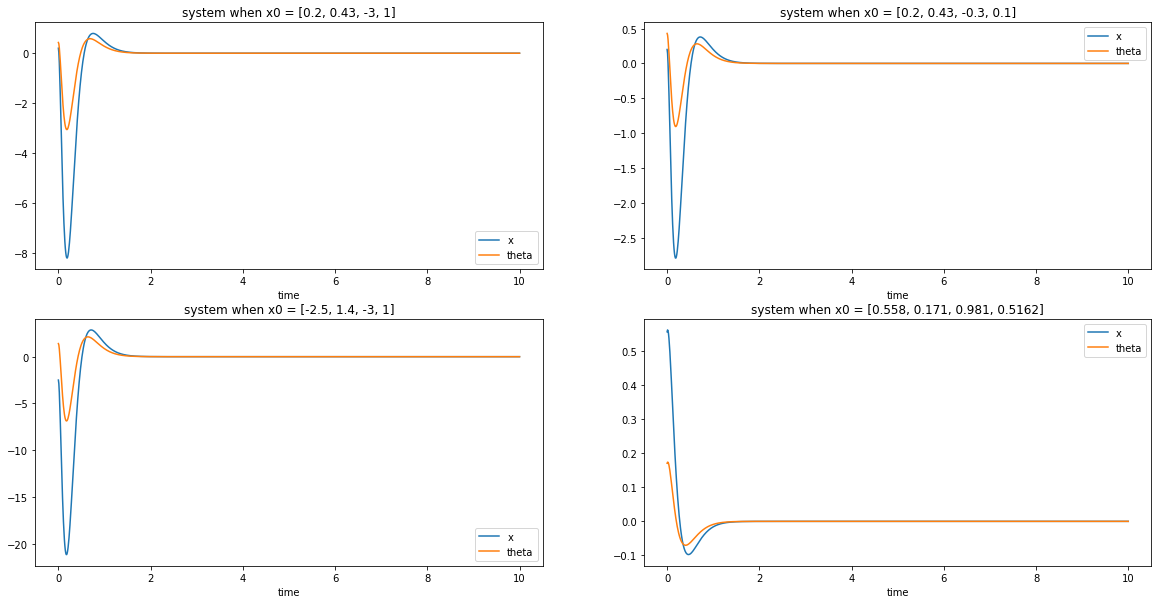

In [83]:

# desired poles
p = np.array([-10 ,-6.6, -8.4, -7])

# obtaining K
K = place_poles(A, B, p)
A_cont = A - B.dot(K.gain_matrix)

# Plotting

plt.figure(figsize=(20, 10))

x0 = [0.2, 0.43, -3, 1]
solution = odeint(func, x0, time)
ax = plt.subplot(221)
plt.plot(time, solution[:, 0], label = 'x')
plt.plot(time, solution[:, 1], label = 'theta')
plt.legend(loc='best')
plt.xlabel('time')
plt.title(f'system when x0 = {x0}')

x0 = [0.2, 0.43, -0.3, 0.1]
solution = odeint(func, x0, time)
ax = plt.subplot(222)
plt.plot(time, solution[:, 0], label = 'x')
plt.plot(time, solution[:, 1], label = 'theta')
plt.legend(loc='best')
plt.xlabel('time')
plt.title(f'system when x0 = {x0}')

x0 = [-2.5, 1.4, -3, 1]
solution = odeint(func, x0, time)
ax = plt.subplot(223)
plt.plot(time, solution[:, 0], label = 'x')
plt.plot(time, solution[:, 1], label = 'theta')
plt.legend(loc='best')
plt.xlabel('time')
plt.title(f'system when x0 = {x0}')

x0 = [0.558, 0.171, 0.981, 0.5162]
solution = odeint(func, x0, time)
ax = plt.subplot(224)
plt.plot(time, solution[:, 0], label = 'x')
plt.plot(time, solution[:, 1], label = 'theta')
plt.legend(loc='best')
plt.xlabel('time')
plt.title(f'system when x0 = {x0}')

plt.show()

# Task G

The task is done for several Q matrices (each cell contains a case for a single Q)

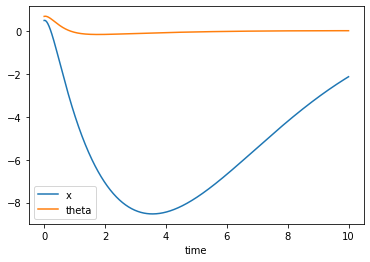

x0:  [0.49472845 0.68402795 0.51495805 0.41599126]
K:  [[ -1.         228.10744504  -5.0340737   75.11999877]]


In [84]:
# weight matrices
Q = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
R = np.array([[1]])

# obtaining K
K, S, E = control.lqr(A, B, Q, R)

A_cont = np.array(A - B.dot(K))

def func_g(x, t):
    x_new = np.array([[x[0]], [x[1]], [x[2]], [x[3]]])
    return A_cont.dot(x_new).flatten()

x0 = np.random.rand(4)
solution = odeint(func_g, x0, time)
plt.plot(time, solution[:, 0], label = 'x')
plt.plot(time, solution[:, 1], label = 'theta')
plt.legend(loc='best')
plt.xlabel('time')
plt.show()

print('x0: ', x0)
print('K: ', K)

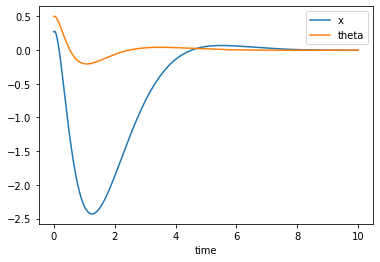

x0:  [0.27302989 0.50074731 0.74601547 0.27151077]
K:  [[-11.09053651 330.622961   -21.99267861 123.18463594]]


In [85]:
# weight matrices
Q = np.array([[123, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 79]])
R = np.array([[1]])

# obtaining K
K, S, E = control.lqr(A, B, Q, R)

A_cont = np.array(A - B.dot(K))

x0 = np.random.rand(4)
solution = odeint(func_g, x0, time)
plt.plot(time, solution[:, 0], label = 'x')
plt.plot(time, solution[:, 1], label = 'theta')
plt.legend(loc='best')
plt.xlabel('time')
plt.show()

print('x0: ', x0)
print('K: ', K)

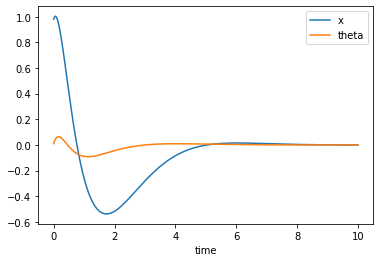

x0:  [0.98098612 0.0097413  0.84553887 0.8129565 ]
K:  [[-11.09053651 329.7595927  -21.95191285 122.47010602]]


In [86]:
# weight matrices
Q = np.array([[123, 0, 23, 0], [0, 1, 37, 0], [5, 0, 1, 0], [0, 0, 0, 1]])
R = np.array([[1]])

# obtaining K
K, S, E = control.lqr(A, B, Q, R)

A_cont = np.array(A - B.dot(K))

x0 = np.random.rand(4)
solution = odeint(func_g, x0, time)
plt.plot(time, solution[:, 0], label = 'x')
plt.plot(time, solution[:, 1], label = 'theta')
plt.legend(loc='best')
plt.xlabel('time')
plt.show()

print('x0: ', x0)
print('K: ', K)

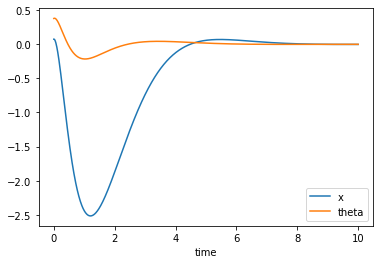

x0:  [0.07525671 0.37932601 0.16170184 0.28261357]
K:  [[-11.09053651 329.7595927  -21.95191285 122.47010602]]


In [87]:
# weight matrices
Q = np.array([[123, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
R = np.array([[1]])

# obtaining K
K, S, E = control.lqr(A, B, Q, R)

A_cont = np.array(A - B.dot(K))

x0 = np.random.rand(4)
solution = odeint(func_g, x0, time)
plt.plot(time, solution[:, 0], label = 'x')
plt.plot(time, solution[:, 1], label = 'theta')
plt.legend(loc='best')
plt.xlabel('time')
plt.show()

print('x0: ', x0)
print('K: ', K)

After running each cell several times (with randomly generated x0) it was observed that the size of the oveshoot highly depends on x0.
